# Previsão de fluxo de bicicletas

* **Sobre:** O projeto consiste em uma previsão sobre o fluxo de aluguéis de bicicletas com base em características climáticas e se é final de semana ou feriado. As aplicações deste tipo de solução são semelhantes ao projeto anterior, sobre o fluxo de passageiros em um aeroporto: pode ser útil para escolher o momento certo para expansão de um negócio, saber quando a demanda de matéria prima e mão de obra será maior, quando fazer uma promoção ou captação ativa de clientes, e afins.

* **Base de Dados:** Quantidade de bicicletas computadas em um determinada data e hora.

* **Referências:** 
  * Estudo desenvolvido acompanhando o curso [Deep Learning: previsão com Keras](https://cursos.alura.com.br/course/deep-learning-previsao-keras), da Alura.

## Abertura do Dataset

In [1]:
import pandas as pd

In [2]:
bike = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv')
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datas        17414 non-null  object 
 1   contagem     17414 non-null  int64  
 2   temperatura  17414 non-null  float64
 3   sensacao     17414 non-null  float64
 4   umidade      17414 non-null  float64
 5   vel_vento    17414 non-null  float64
 6   clima        17414 non-null  float64
 7   feriado      17414 non-null  float64
 8   final_ds     17414 non-null  float64
 9   estacao      17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


## Tratamentos e primeiras visualizações

In [4]:
bike['datas'] = pd.to_datetime(bike['datas'])

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("dark")
sns.set_palette(['#59b9df', '#3fc79c', '#c6a3fb', '#e7a567'])

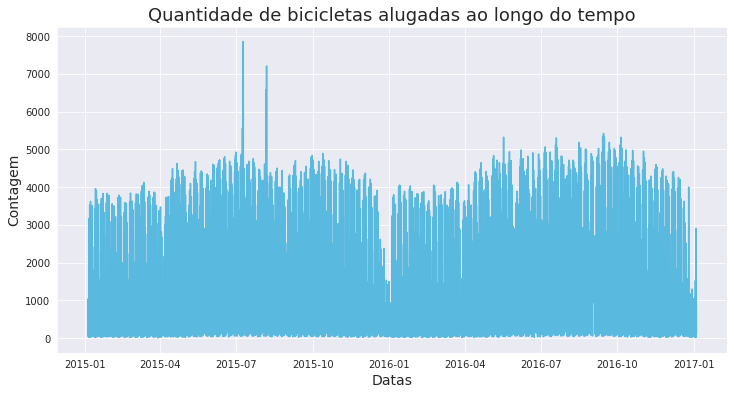

In [12]:
plt.figure(figsize = (12, 6))

sns.lineplot(data = bike, x = 'datas', y = 'contagem')

plt.xlabel('Datas', fontsize = 14)
plt.ylabel('Contagem', fontsize = 14)
plt.title('Quantidade de bicicletas alugadas ao longo do tempo', fontsize = 18)
plt.grid(True)

plt.show()

### Escalonamento

* Métodos de otimização baseados em Gradiente funcionam melhor com entradas escalonadas.

In [13]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc = StandardScaler()
sc.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler()

In [18]:
y = sc.transform(bike['contagem'].values.reshape(-1,1))

## Divisão de conjuntos de treino e teste

### 90% dos dados serão para treino

In [19]:
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike) - tamanho_treino

In [20]:
y_train = y[:tamanho_treino]
y_test = y[tamanho_treino:]

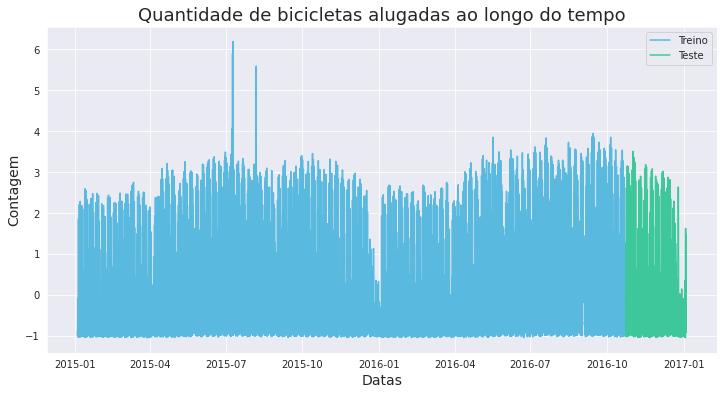

In [27]:
plt.figure(figsize = (12, 6))

sns.lineplot(data = bike[:tamanho_treino], x = 'datas', y = y_train[:,0], label = 'Treino')
sns.lineplot(data = bike[tamanho_treino:], x = 'datas', y = y_test[:,0], label = 'Teste')

plt.xlabel('Datas', fontsize = 14)
plt.ylabel('Contagem', fontsize = 14)
plt.title('Quantidade de bicicletas alugadas ao longo do tempo', fontsize = 18)
plt.grid(True)

plt.show()

In [24]:
y_train[:,0]

array([-0.88574518, -0.9262953 , -0.92998167, ..., -0.9548647 ,
       -0.9548647 , -0.89403952])

### Utilizando dados históricos de saída (10)

In [30]:
import numpy as np

In [28]:
def separa_dados(vetor, n_passos):
  X_novo, y_novo = [], []

  for i in range(n_passos, vetor.shape[0]):
    X_novo.append(list(vetor.loc[i - n_passos : i-1]))
    y_novo.append(vetor.loc[i])

  X_novo, y_novo = np.array(X_novo), np.array(y_novo)

  return X_novo, y_novo

In [31]:
vetor = pd.DataFrame(y_train)[0]
X_train, y_train = separa_dados(vetor, 10)

In [36]:
vetor2 = pd.DataFrame(y_test)[0]
X_test, y_test = separa_dados(vetor, 10)

In [34]:
X_train[:3]

array([[-0.88574518, -0.9262953 , -0.92998167, -0.98712048, -1.01016032,
        -1.01108192, -1.00647395, -0.9843557 , -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, -1.01016032, -1.01108192,
        -1.00647395, -0.9843557 , -0.93274645, -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, -1.01108192, -1.00647395,
        -0.9843557 , -0.93274645, -0.77607553, -0.56687377, -0.38347663]])

In [35]:
y_train[:3]

array([-0.56687377, -0.38347663, -0.25906149])

# Redes Neurais Recorrentes

* Os métodos estudados anteriormente ([previsão de fluxo de clientes](https://colab.research.google.com/drive/1Lna_c5YRh7R7HjZQpWZKgwpneyMkqlbY?usp=sharing)) não conseguem "entender" o caráter sequencial das Séries Temporais, em que cada uma das informações está correlacionada.

* Modelos Recorrentes costumam ser usadas em Séries Temporais e Textos (palavras ou caracteres).

* É utilizada uma janela deslizante de um tamanho especificado. Os dados históricos são coletados no intervalo desta janela e adicionados à entrada da próxima iteração.

* Recebe uma matriz tridimensional, em que a terceira dimensão define o número de atributos por passo no tempo.

### Redimensionamento das entradas

In [49]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

## Definição da Rede

* **LSTM** (Long Short Term Memory)
  * É usado em séries muito longas, uma rede neural recorrente comum não consegue lidar com padrões muito distantes da iteração corrente (históricos distantes).

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [52]:
recorrente = Sequential()

recorrente.add(
    LSTM(128, input_shape = (X_train.shape[1], X_train.shape[2]))
)
recorrente.add(
    Dense(units = 1)
)

recorrente.compile(loss = 'mean_squared_error', optimizer = 'RMSProp')

In [53]:
recorrente.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
